# FINAL PROJECT

***DETERMINING THE MOST AFFECTED COUNTRIES BY COVID19***

***PROJECT GOAL***

The main aim of the project is to determine the most affected countries by covid-19 during the year 2020 and showcasing the results by the help of data visualization

***DATASET:***

Dataset:

https://www.kaggle.com/competitions/covid19-global-forecasting-week-3/overview

https://raw.githubusercontent.com/Mbicha/data_science/main/data/trainweek3_2.csv'


***Importing the required libraries***

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

import warnings
warnings.filterwarnings('ignore')

***Loading and readaing data from various sources***

In [2]:
def load_data():
    """
    Reads data from various sources and convert to dataframe
    return 3 dataframes
    """
    covid_df1 = pd.read_csv('trainweek3.csv')
    covid_df2 = pd.read_json('covid_data.json')
    covid_df3 = pd.read_csv('https://raw.githubusercontent.com/Mbicha/data_science/main/data/trainweek3_2.csv')

    return covid_df1, covid_df2, covid_df3

***In this section, we are merging all the datasets to get the final one***

In [3]:
def combine_merge_dataframes():
    
    """
    Merges the three datasets twice.\n
    Merge1 -> Merge df1 and df3 using merge\n
    Example1: pd.merge(df1, df3, on=[col1, col2])\n
    
    
    Merge2 -> Merge Resulting dataframe with df2 using concatenatation\n
    Example2: pd.concat([merge2_df, df2], axis = 0, ignore_index = True)
    Usage: combine_merge_dataframes()
    
    """
    df1, df2, df3 = load_data()
    df1_df3 = pd.merge(df1, df3, on=['Id', 'Id'])
    result_df = pd.concat([df1_df3, df2], axis = 0, ignore_index = True)

    return result_df

combine_merge_dataframes()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,22-01-2020,0,0
1,2,NaN,Afghanistan,23-01-2020,0,0
2,3,NaN,Afghanistan,24-01-2020,0,0
3,4,NaN,Afghanistan,25-01-2020,0,0
4,5,NaN,Afghanistan,26-01-2020,0,0
...,...,...,...,...,...,...
23557,5560,,Zimbabwe,2020-04-03 00:00:00,9,1
23558,5561,,Zimbabwe,2020-04-04 00:00:00,9,1
23559,5562,,Zimbabwe,2020-04-05 00:00:00,9,1
23560,5563,,Zimbabwe,2020-04-06 00:00:00,10,1


***Pivot tables***

***The following function is for pivoting data from the dataframe provided. Key and values are provided as parameters.***

In [4]:
def pivot_table_country(dataframe, key, values):
    
    """
    Accepts dataframe, key, values as a parameter\n
    dataframe -> Dataframe from which pivot is to be applied,\n
    key -> index column\n
    values -> Value columns
    Usage: pivot_table_country(data=df, key, value)
    Return resulting pivoted dataframe
    
    
    """
    
    
    df = pd.pivot_table(data=dataframe, index=key, values=values)
    
    
    return df

In [5]:
df = combine_merge_dataframes()
confirmed_cases_pivot = pivot_table_country(df, 'Country_Region', 'ConfirmedCases')
confirmed_cases_pivot.head(3)

,ConfirmedCases
Country_Region,
Afghanistan,44.857143
Albania,58.779221
Algeria,172.649351


In [6]:
df = combine_merge_dataframes()
fatalities_pivot = pivot_table_country(df, 'Country_Region', 'Fatalities')
fatalities_pivot.head(3)

,Fatalities
Country_Region,
Afghanistan,1.090909
Albania,2.883117
Algeria,15.857143


***TRANSFORMATIONS***

***In this section, we are going to perform various transformations.***

***remove_nan - This function drops all rows with na and return dataframe without na***

In [7]:
def remove_nan(dataframe):
    """
    Pass dataframe as parameter\n
    Check if there are na values and drop rows with these values\n
    Return na free dataframe
    """
    return dataframe.dropna()

In [8]:
df_without_na = remove_nan(df)
df_without_na.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
616,617,Australian Capital Territory,Australia,22-01-2020,0,0
617,618,Australian Capital Territory,Australia,23-01-2020,0,0
618,619,Australian Capital Territory,Australia,24-01-2020,0,0
619,620,Australian Capital Territory,Australia,25-01-2020,0,0
620,621,Australian Capital Territory,Australia,26-01-2020,0,0


***add_year_month_day_columns - This function adds 3 columns year, month and day form the date given as a parameter.***

In [9]:
def add_year_month_day_columns(df, col):
    
    """
    Accepts 2 parameters: df, col1\n
    df -> Dataframe to be passed\n
    col -> Column with Date object
    
    
    Return dataframe with newly added column
    
    """
    df['Year'] = pd.to_datetime(df[col]).dt.year
    df['Month'] = pd.to_datetime(df[col]).dt.month
    df['Day'] = pd.to_datetime(df[col]).dt.day
    
    
    return df

In [10]:
df_with_more_columns = add_year_month_day_columns(df_without_na, 'Date')
df_with_more_columns.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Year,Month,Day
616,617,Australian Capital Territory,Australia,22-01-2020,0,0,2020,1,22
617,618,Australian Capital Territory,Australia,23-01-2020,0,0,2020,1,23
618,619,Australian Capital Territory,Australia,24-01-2020,0,0,2020,1,24
619,620,Australian Capital Territory,Australia,25-01-2020,0,0,2020,1,25
620,621,Australian Capital Territory,Australia,26-01-2020,0,0,2020,1,26


In [11]:
df_with_more_columns['Year'].unique()

array([2020])

***The data is for only one year. Therefore we can drop Year column***

In [12]:
def drop_colunm(df, col='Year'):
    
    
    """
    Accepts two parameters: df, col\n
    df -> Dataframe with column to be dropped\n
    col -> Column to be dropped\n
    Default value of column is Year since it is our target column, this value is subject to change as shown belew\n
    Example and Usage: drop_column(data=df, col='Day')
    
    
    """
    return df.drop([col], axis=1)

In [13]:
df_without_year_col = drop_colunm(df=df_with_more_columns)
df_without_year_col.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Month,Day
616,617,Australian Capital Territory,Australia,22-01-2020,0,0,1,22
617,618,Australian Capital Territory,Australia,23-01-2020,0,0,1,23
618,619,Australian Capital Territory,Australia,24-01-2020,0,0,1,24
619,620,Australian Capital Territory,Australia,25-01-2020,0,0,1,25
620,621,Australian Capital Territory,Australia,26-01-2020,0,0,1,26


***replace_month_number_with_name - Replace the month number with month name. For instance, if value is 1, then return Jan***

In [14]:
def replace_month_number_with_name(df):
    
    
    """
    
    Replaces month number with name\n
    Return dataframe with month names but not numbers
    
    """
    df['Month'] = df['Month'].apply(lambda month_number: calendar.month_abbr[month_number])
    
    return df

In [15]:
replace_month_number_with_name(df_without_year_col)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Month,Day
616,617,Australian Capital Territory,Australia,22-01-2020,0,0,Jan,22
617,618,Australian Capital Territory,Australia,23-01-2020,0,0,Jan,23
618,619,Australian Capital Territory,Australia,24-01-2020,0,0,Jan,24
619,620,Australian Capital Territory,Australia,25-01-2020,0,0,Jan,25
620,621,Australian Capital Territory,Australia,26-01-2020,0,0,Jan,26
...,...,...,...,...,...,...,...,...
23557,5560,,Zimbabwe,2020-04-03 00:00:00,9,1,Apr,3
23558,5561,,Zimbabwe,2020-04-04 00:00:00,9,1,Apr,4
23559,5562,,Zimbabwe,2020-04-05 00:00:00,9,1,Apr,5
23560,5563,,Zimbabwe,2020-04-06 00:00:00,10,1,Apr,6


***rename_columns_name - This function renames the column with the name provided as new name.***

***For instance, if old name is 'Old_Year' and new name is 'Year', then the column name changes to Year.***

In [16]:
def rename_columns_name(df, old_name, new_name):
    """
    Renames column\n
    Accepts 3 parameters; df, old_name, new_name\n
    df -> dataframe with column name to be changed\n
    old_name -> current column name\n
    new_name -> new name of the column\n
    Return dataframe with new column name
    """
    df.rename(columns = {old_name:new_name}, inplace = True)
    return df

In [17]:
rename_columns_name(df_without_year_col, 'ConfirmedCases', 'Confirmed_Cases')

,Id,Province_State,Country_Region,Date,Confirmed_Cases,Fatalities,Month,Day
616,617,Australian Capital Territory,Australia,22-01-2020,0,0,Jan,22
617,618,Australian Capital Territory,Australia,23-01-2020,0,0,Jan,23
618,619,Australian Capital Territory,Australia,24-01-2020,0,0,Jan,24
619,620,Australian Capital Territory,Australia,25-01-2020,0,0,Jan,25
620,621,Australian Capital Territory,Australia,26-01-2020,0,0,Jan,26
...,...,...,...,...,...,...,...,...
23557,5560,,Zimbabwe,2020-04-03 00:00:00,9,1,Apr,3
23558,5561,,Zimbabwe,2020-04-04 00:00:00,9,1,Apr,4
23559,5562,,Zimbabwe,2020-04-05 00:00:00,9,1,Apr,5
23560,5563,,Zimbabwe,2020-04-06 00:00:00,10,1,Apr,6


***DATA VISUALIZATION***

Visualizing the data and identifing patterns.

bar_plot_visualization - the function returns bar plot with stardard parameters, the dataframe, x and y are passed as parameters.
For example; If the dataframe has year, numbers as columns then then bar_plot_visualization(data=dataframe, x='year', y='numbers')

In [18]:
def bar_plot_visualization(df, colX, colY):
    
    """
    Passes dataframe, colX, colY as a parameters\n
    colX -> Column x data\n
    colY -> Column y data\n
    
    Return bar plot as per passed parameters
    
    
    """
    
    return sns.barplot(data=df, x=colX, y=colY)

***Visualizing the data for confirmed and fatalities using bar plot***

In [19]:
confirmed_cases_pivot.columns

Index(['ConfirmedCases'], dtype='object')

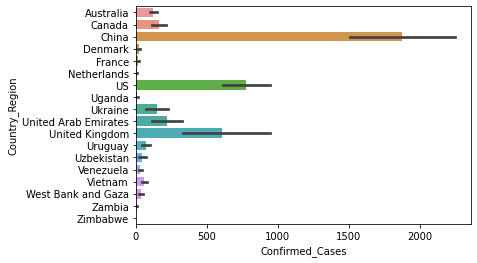

In [20]:
bar_plot_visualization(df_without_year_col, 'Confirmed_Cases', 'Country_Region')

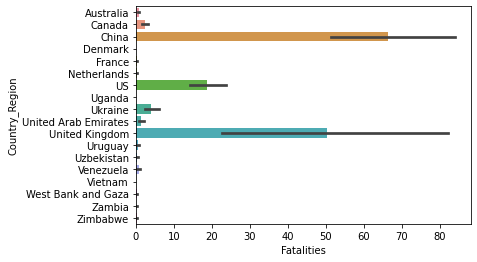

In [21]:
bar_plot_visualization(df_without_year_col, 'Fatalities', 'Country_Region')

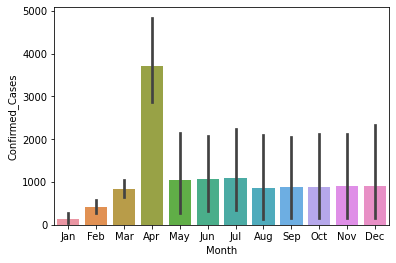

In [22]:
bar_plot_visualization(df_without_year_col, 'Month', 'Confirmed_Cases')

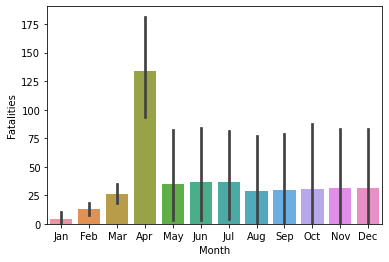

In [23]:
bar_plot_visualization(df_without_year_col, 'Month', 'Fatalities')

***SCATTERED PLOT***

visualize_with_scatter_plot - function displays the scattered plot with dataframe, x, and y as parameters.

In [24]:
def visualize_with_scatter_plot(df, colX, colY):
    """
    Passes dataframe, colX, colY as a parameters\n
    colX -> Column x data\n
    colY -> Column y data\n
    Return scatter plot as per passed parameters
    """
    return sns.scatterplot(data=df, x=colX, y=colY)

***Visualizing the confirmed cases and fatilities with scattered plot***

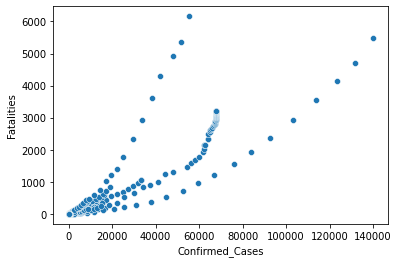

In [25]:
visualize_with_scatter_plot(df_without_year_col, 'Confirmed_Cases', 'Fatalities')

***COUNT PLOT***

visualize_with_count_plot - This function can accepts dataframe and one parameter whose values will be counted.

In [26]:
def visualize_with_count_plot(df, colX):
    """
    Passes dataframe, colY as a parameters\n
    colX -> Column x data\n
    Return count plot as per passed parameters
    """
    return sns.countplot(data=df, x=colX)

***Visualizing the data with count plot***

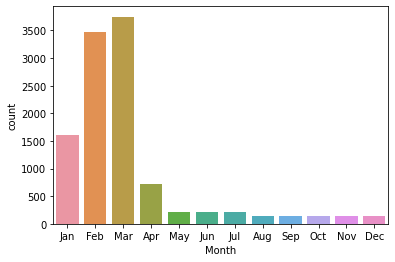

In [27]:
visualize_with_count_plot(df_without_year_col, 'Month')

***CONCLUSION***

***From visualization, we can conlude that:***



China registered high number of confirmed cases and fatalities, followed by both US and United Kingdom.


Total number of both cases increased exponentially from January to April.


Fatalities increased with increase in covid19 infections.